*Deprecated*: Please use the make_report.py script in ```/src/reports```

# Cohort 2: Beiwe Check-up
This notebook is meant to import summary data from [beiwe](https://bw2.ut-wcwh.org/dashboard/9/data_stream/accelerometer) to see how well subjects are participating. The notebook checks primarily two datastreams:
1. survey data (morning, evening, and weekly) - proxy for active participation
2. accelerometer data - proxy for passive participation

In [9]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

import sys
sys.path.append('/Users/hagenfritz/projects/utx000') 
from src.reports import make_report

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data Import
We will be importing data from the ```/data/interim/``` directory

In [10]:
import pandas as pd
import numpy as np
from datetime import datetime
import math

We will hardcode the date based on when the data were downloaded and then this string is used to import the correct data.

In [11]:
dateThru = '06082020'
firstDate = datetime(2020,5,13)
lastDate = datetime.strptime(dateThru,'%m%d%Y')
maxDailySurveys = np.busday_count(firstDate.date(), lastDate.date(), weekmask='Sun Mon Wed Fri')
maxWeeklySurveys = np.busday_count(firstDate.date(), lastDate.date(), weekmask='Sat')

**IMPORTANT**: The accelerometer data from the beiwe website, for whatever reason, is given as a string and Python cannot convert it to a number easily. The easiest thing to do is open the csv, select all the cells with the data, change the data type from "General" to "Numeric", and save over. 

## Survey Data

In [12]:
def import_survey_summary(surveyType='morning', lastDate=datetime(2020,5,14), maxSurveys=1):
    '''
    Imports survey summary csv files, cuts it down to the specified date, and returns a cleaned dataframe
    '''
    
    # importing datafile
    temp = pd.read_csv(f'/Users/hagenfritz/Projects/utx000/data/interim/survey_mood_{surveyType}_summary.csv',
                  index_col=0)
    
    # getting dataframe in date range
    df = pd.DataFrame()
    for column in temp.columns:
        if datetime.strptime(column,'%m/%d/%Y') <= lastDate:
            df = pd.concat([df,temp[column]],axis=1)
        
    # converting elements to numbers and creating sum/percent column
    for column in df.columns:
        df[column] = pd.to_numeric(df[column],errors='coerce')
        
    df['Sum'] = df.sum(axis=1)
    df['Percent'] = df['Sum'] / maxSurveys
    
    return df

In [13]:
morn = import_survey_summary('morning',lastDate,maxDailySurveys)
morn.head()

,05/13/2020,05/14/2020,05/15/2020,05/16/2020,05/17/2020,05/18/2020,05/19/2020,05/20/2020,05/21/2020,05/22/2020,...,06/01/2020,06/02/2020,06/03/2020,06/04/2020,06/05/2020,06/06/2020,06/07/2020,06/08/2020,Sum,Percent
Participant ID,,,,,,,,,,,,,,,,,,,,,
15tejjtw,0,1,0,1,1,1,0,1,0,1,...,0,0,1,0,1,0,1,0,13,0.866667
1a9udoc5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,3,0.200000
2xtqkfz1,1,0,1,0,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,10,0.666667
43b1cd5m,0,0,0,0,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,5,0.333333
4i7679py,1,0,1,0,0,1,0,1,0,1,...,0,0,0,1,1,0,0,1,12,0.800000


In [14]:
night = import_survey_summary('evening',lastDate,maxDailySurveys)
night.head()

,05/13/2020,05/14/2020,05/15/2020,05/16/2020,05/17/2020,05/18/2020,05/19/2020,05/20/2020,05/21/2020,05/22/2020,...,06/01/2020,06/02/2020,06/03/2020,06/04/2020,06/05/2020,06/06/2020,06/07/2020,06/08/2020,Sum,Percent
Participant ID,,,,,,,,,,,,,,,,,,,,,
15tejjtw,0,1,0,1,1,0,1,1,0,1,...,0,0,1,1,0,1,1,0,14,0.933333
1a9udoc5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,4,0.266667
2xtqkfz1,0,0,2,0,0,1,0,1,0,0,...,0,0,0,0,1,1,0,0,11,0.733333
43b1cd5m,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,3,0.200000
4i7679py,0,0,0,0,1,1,0,1,0,1,...,0,0,0,1,0,1,0,1,11,0.733333


In [15]:
week = import_survey_summary('week',lastDate,maxWeeklySurveys)
week.head()

,05/09/2020,05/10/2020,05/11/2020,05/12/2020,05/13/2020,05/14/2020,05/15/2020,05/16/2020,05/17/2020,05/18/2020,...,05/31/2020,06/01/2020,06/02/2020,06/03/2020,06/04/2020,06/05/2020,06/06/2020,06/07/2020,Sum,Percent
Participant ID,,,,,,,,,,,,,,,,,,,,,
15tejjtw,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,5,1.25
1a9udoc5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0.25
2xtqkfz1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,5,1.25
43b1cd5m,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,2,0.50
4i7679py,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,5,1.25


## Sensors Data

In [16]:
acc = pd.read_csv(f'/Users/hagenfritz/Projects/utx000/data/interim/acc_summary.csv',
                  index_col=0)
acc.head()

,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,...,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20
Participant ID,,,,,,,,,,,,,,,,,,,,,
15tejjtw,0.0,0.0,0.0,32421.0,78637.0,43246.0,0.0,0.0,0.0,0.0,...,78501.0,78644.0,78635.0,78641.0,78650.0,69200.0,78592.0,79227.0,79223.0,36630.0
1a9udoc5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1792.0,78401.0,77763.0,78341.0,78407.0,78331.0,33500.0
2xtqkfz1,0.0,5970.0,56660.0,4772.0,2390.0,3816.0,42511.0,21362.0,59109.0,14923.0,...,70426.0,0.0,2.0,0.0,0.0,3718.0,2404.0,8059.0,77778.0,37700.0
43b1cd5m,0.0,28009.0,11321.0,60668.0,14287.0,6473.0,43447.0,23542.0,61347.0,10085.0,...,24577.0,73526.0,13059.0,21723.0,22638.0,595.0,14224.0,32539.0,43501.0,0.0
4i7679py,0.0,0.0,0.0,0.0,19309.0,61405.0,62609.0,55936.0,31881.0,56025.0,...,78776.0,78872.0,78766.0,78651.0,73307.0,76366.0,76400.0,76332.0,78749.0,33076.0


# Visualization

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from datetime import datetime

## Overview

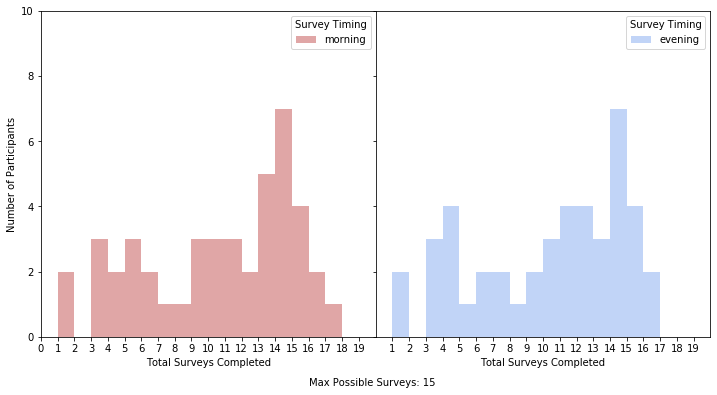

In [19]:
fig, axes = plt.subplots(1,2,figsize=(12,6),sharey=True)
i = 0
colors = ('firebrick','cornflowerblue')
for df,name in zip([morn,night],['morning','evening']):
    ax = axes[i]
    sns.distplot(df['Sum'],bins=np.arange(0,maxDailySurveys+5,1),color=colors[i],kde=False,label=name,ax=ax)
    ax.set_xticks(np.arange(0,maxDailySurveys+5,1))
    ax.set_xlim([0,maxDailySurveys+5])
    ax.set_ylim([0,10])
    ax.set_xlabel('Total Surveys Completed')
    ax.legend(title='Survey Timing')
    i += 1

axes[0].set_ylabel('Number of Participants')
axes[0].text(maxDailySurveys+1,-1.5,f'Max Possible Surveys: {maxDailySurveys}')
axes[1].set_xticks(np.arange(1,maxDailySurveys+5,1))
    
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=None)
#plt.savefig('../reports/beiwe_check/daily_survey_summary_histogram.png')

plt.show()
plt.close()

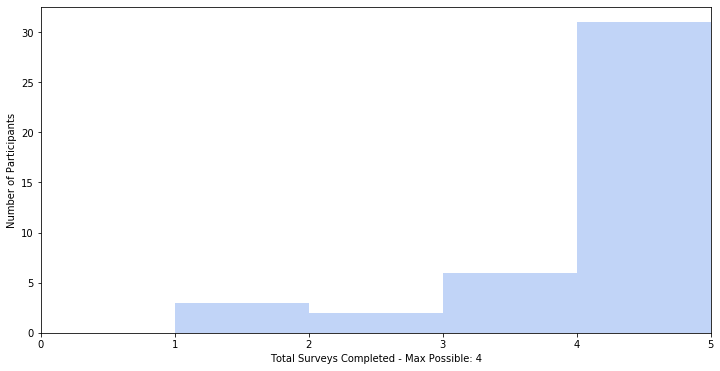

In [20]:
fig,ax = plt.subplots(figsize=(12,6))
sns.distplot(week['Sum'],bins=np.arange(0,6,1),kde=False,color='cornflowerblue')
ax.set_xticks(np.arange(0,6,1))
ax.set_xlabel(f'Total Surveys Completed - Max Possible: {maxWeeklySurveys}')
ax.set_xlim([0,5])
ax.set_ylabel('Number of Participants')

#plt.savefig('../reports/beiwe_check/weekly_survey_summary_histrogram.png')

plt.show()
plt.close()

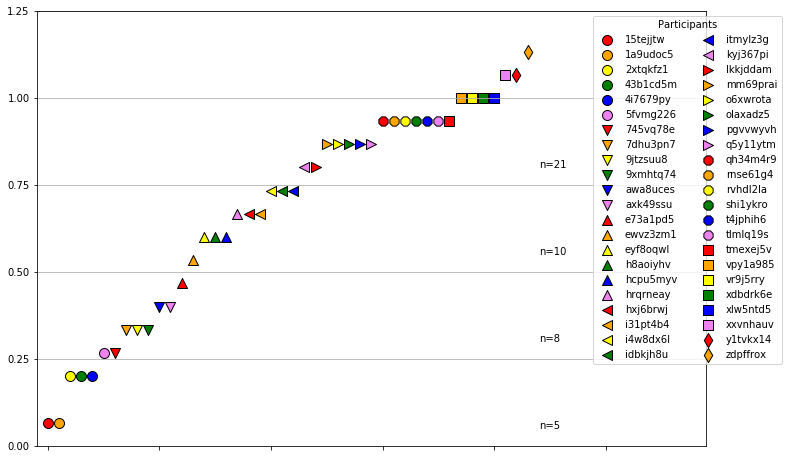

In [37]:
fig, ax = plt.subplots(figsize=(12,8))
colors = ['red','orange','yellow','green','blue','violet']
shapes = ['o', 'v', '^', '<', '>', '8', 's', 'd']
df = morn.sort_values('Sum')
per = np.zeros(4)
for i in range(len(morn)):
    ax.scatter(i,df['Sum'][i]/maxDailySurveys,color=colors[i%6],edgecolor='black',marker=shapes[math.floor(i/6)],s=100,label=morn.index[i])
    if df['Sum'][i]/maxDailySurveys < 0.25:
        per[0] += 1
    elif df['Sum'][i]/maxDailySurveys < 0.5:
        per[1] += 1
    elif df['Sum'][i]/maxDailySurveys < 0.75:
        per[2] += 1
    else:
        per[3] += 1
ax.legend(title='Participants',bbox_to_anchor=(1.12,1),ncol=2)
ax.set_xticklabels([])
ax.set_yticks([0,0.25,0.5,0.75,1,1.25])
ax.set_xlim([-1,len(morn)+15])
ax.grid(axis='y')

for p, spot in zip(per,[0.05,0.3,0.55,0.8]):
    ax.text(len(morn),spot,f'n={int(p)}')
    
plt.show()
plt.close()

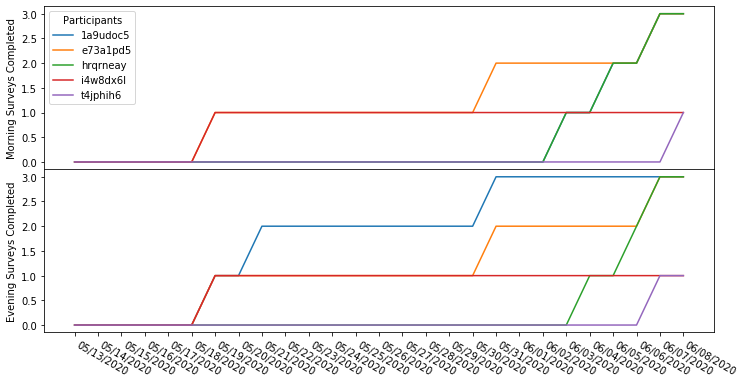

In [25]:
fig, axes = plt.subplots(2,1,figsize=(12,6),sharex=True)
for survey,ax in zip([morn,night],axes):
    poorSports = survey[survey['Percent'] <= 0.25]
    for i in range(len(poorSports)):
        ax.plot(np.cumsum(poorSports.iloc[i,:-2]),label=poorSports.index[i])
    
axes[0].legend(title='Participants',loc='upper left')
axes[0].set_ylabel('Morning Surveys Completed')
axes[1].set_ylabel('Evening Surveys Completed')
plt.subplots_adjust(hspace=0)
plt.xticks(rotation=-30,ha='left')
#plt.savefig()
plt.show()
plt.close()

## Timeseries

### Morning and Evening Surveys

In [ ]:
fig,ax = plt.subplots(figsize=(12,6))
for df,name in zip([morn,night],['morning','evening']):
    dates = []
    daily = []
    for column in df.columns:
        if column in ['Sum','Percent']:
            continue
            
        dates.append(datetime.strptime(column,'%m/%d/%Y'))
        daily.append(np.sum(df[column]))
        
    #ax.stem(dates,daily)
    if name == 'morning':
        plt.vlines(x=dates, ymin=0, ymax=daily, color='orange',alpha=1)
        plt.scatter(dates,daily,s=50, color='orange',edgecolor='black',alpha=1,label='morning')
    else:
        plt.vlines(x=dates, ymin=0, ymax=dailys, color='purple',alpha=1)
        plt.scatter(dates,daily,s=100, color='purple',edgecolor='black',alpha=1,label='evening')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%a %m/%d'))
    ax.xaxis.set_major_locator(mdates.DayLocator())
    plt.xticks(rotation=-30,ha='left')
    ax.set_ylabel('Number of Surveys Submitted Daily')
    ax.set_ylim([0,30])
    ax.set_yticks(np.arange(0,31,2))

ax.grid(axis='y')    
ax.legend(title='Survey Timing')

#plt.savefig('../reports/beiwe_check/daily_survey_timeseries.png')

plt.show()
plt.close()

### Weekly Survey

In [ ]:
fig,ax = plt.subplots(figsize=(12,6))
df = week
dates = []
daily = []
for column in df.columns:
    if column in ['Sum','Percent']:
        continue

    dates.append(datetime.strptime(column,'%m/%d/%Y'))
    daily.append(np.sum(df[column]))

#ax.plot(dates,daily)
plt.vlines(x=dates, ymin=0, ymax=daily, color='orange',alpha=1)
plt.scatter(dates,daily,s=50, color='orange',edgecolor='black',alpha=1,label='morning')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a %m/%d'))
ax.xaxis.set_major_locator(mdates.DayLocator())
plt.xticks(rotation=-30,ha='left')
ax.set_ylabel('Number of Surveys Submitted Daily')
ax.set_ylim([0,30])
ax.set_yticks(np.arange(0,31,2))

ax.grid(axis='y')
#plt.savefig('../reports/beiwe_check/weekly_survey_timeseries.png')

plt.show()
plt.close()

### Accelerometer

In [ ]:
fig,ax = plt.subplots(figsize=(12,6))
df = acc
dates = []
daily = []
for column in df.columns:
    if column == 'sum':
        continue

    dates.append(datetime.strptime(column,'%m/%d/%y'))
    daily.append(np.sum(df[column]))

#ax.plot(dates,daily)
plt.vlines(x=dates, ymin=0, ymax=daily, color='orange',alpha=1)
plt.scatter(dates,daily,s=50, color='orange',edgecolor='black',alpha=1,label='morning')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a %m/%d'))
ax.xaxis.set_major_locator(mdates.DayLocator())
plt.xticks(rotation=-30,ha='left')
ax.set_xlim([datetime(2020,4,24),datetime(2020,5,31)])
ax.set_ylim([0,1750000])
ax.set_ylabel('Number of Daily Bytes')

#plt.savefig('../reports/beiwe_check/acc_timeseries.png')

plt.show()
plt.close()

# Report Generation

In [ ]:
#report_gen = make_report.beiwe_participation_report('06082020')
#report_gen.generate_report()